In [88]:
#import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


# K-nearest neighbour(KNN)
 KNN is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the 'k' nearest data points in the feature space and making predictions based on their labels or values. 

In [89]:
# Example of KNN classifier on iris dataset


In [90]:
#load the dataset 
f = sns.load_dataset('iris')

In [91]:
f

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [92]:
x = f.drop('species', axis=1)
y = f['species']


In [93]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [94]:
#load and fit the KNN classifier on the data 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)
#make predictions on the data
predictions = knn.predict([[5.1, 3.5, 1.4, 0.2]])
     
#check the predictions
print(predictions)

['setosa']


c:\Users\Md. Emon\.conda\envs\python_ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [95]:
#trin test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#fit the model on the training data
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)
#make predictions on the test data      
predictions = model.predict([[5.1, 3.5, 1.4, 0.2]])
predictions

c:\Users\Md. Emon\.conda\envs\python_ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [96]:
#evuluate the model
from sklearn.metrics import  classification_report, confusion_matrix
#make predictions on the test data
y_pred = model.predict(x_test)
#check the classification report
print(classification_report(y_test, y_pred))
#check the confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Axes: >

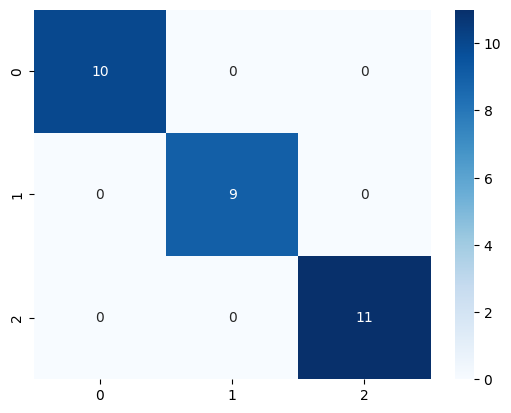

In [97]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

In [98]:
#Regression problem using KNN tips dataset 
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [99]:
#take tip column as target variable
x = df.drop('tip', axis=1)
y = df['tip']


In [100]:
from sklearn.preprocessing import LabelEncoder
#encode categorical variables
for col in x.columns:
    if x[col].dtype == 'object' or x[col].dtype == 'category':
        x[col]= LabelEncoder().fit_transform(x[col])

      

In [101]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#fit the model on the training data
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)
model.predict([[10.75, 1, 0, 1, 1,1]])  # Example input: [total_bill, size, smoker, day, time]


c:\Users\Md. Emon\.conda\envs\python_ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.07])

In [104]:
y_pred = model.predict(x_test)
y_pred

array([2.884, 1.922, 3.978, 3.516, 1.898, 3.124, 4.094, 1.824, 2.218,
       2.888, 3.026, 2.07 , 1.772, 2.322, 1.966, 3.05 , 3.188, 3.608,
       2.562, 4.262, 3.33 , 2.78 , 2.358, 1.678, 3.476, 1.786, 1.678,
       2.992, 2.538, 6.346, 4.25 , 2.678, 2.928, 2.994, 2.364, 3.546,
       1.74 , 4.262, 1.896, 3.962, 1.988, 2.244, 3.614, 2.228, 1.758,
       2.214, 2.448, 2.946, 2.276])